# Plots made to illustrate calibration 

## Calibration Period, split hotstart, warmup and evaluation for autocalibration

In [2]:
import mikeio
# load dfs0 boundary conditions
bc_ds = mikeio.read("/teamspace/studios/1-0-stroemungsatlas-simulation-final/stroemungsatlas/misc_data/stadersandWasserstand_2021-2022x1p03_105s.dfs0")
bc_us = mikeio.read("/teamspace/studios/1-0-stroemungsatlas-simulation-final/stroemungsatlas/misc_data/NeuDarchau_Abfluss_2022-2023+1day.dfs0")

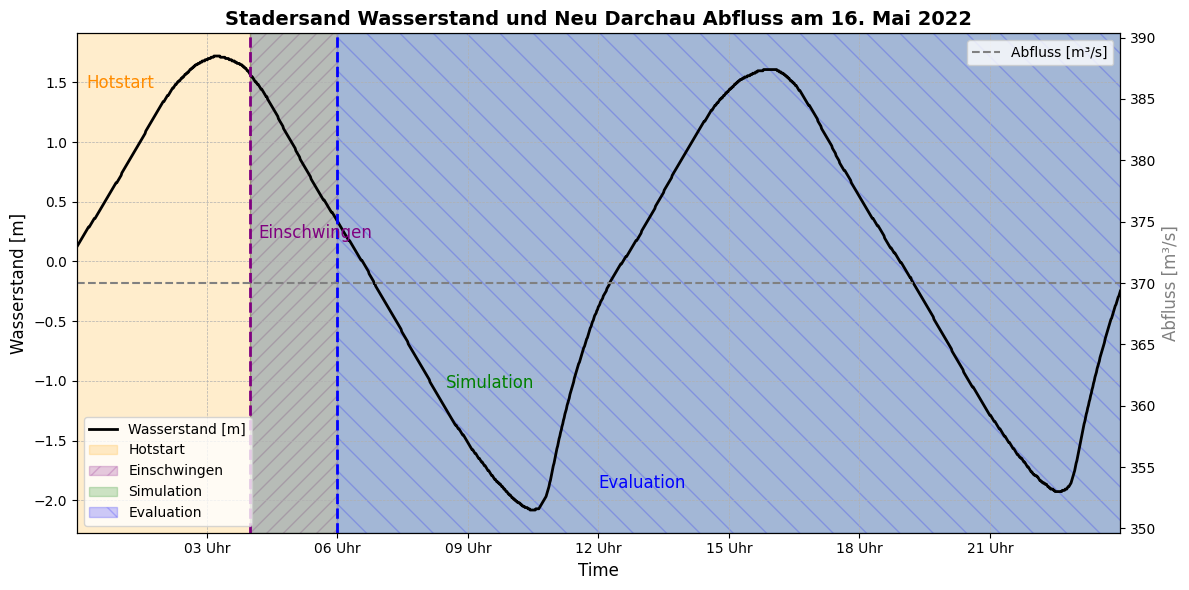

In [4]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

# Plotting data
line1, = ax1.plot(bc_ds.to_dataframe().loc['2022-05-16'], 'k-', label="Wasserstand [m]", linewidth=2)
ax2.axhline(y=bc_us.to_dataframe().loc['2022-05-16'].values, color='gray', linestyle='--', linewidth=1.5, label="Abfluss [m³/s]")

# Labels and title
ax1.set_xlabel('Time', fontsize=12)
ax1.set_ylabel('Wasserstand [m]', color='k', fontsize=12)
ax2.set_ylabel('Abfluss [m³/s]', color='gray', fontsize=12)
ax1.set_title('Stadersand Wasserstand und Neu Darchau Abfluss am 16. Mai 2022', fontsize=14, fontweight='bold')

# Set x-limits
ax1.set_xlim(line1.get_xdata().min(), line1.get_xdata().max())

# Formatting x-axis for time
date_format = mdates.DateFormatter('%H Uhr')
ax1.xaxis.set_major_formatter(date_format)

# Shaded areas for different phases with transparency and hatch patterns
ax1.axvspan(pd.Timestamp('2022-05-16 00:00'), pd.Timestamp('2022-05-16 04:00'), color='orange', alpha=0.2, label='Hotstart')
ax1.axvspan(pd.Timestamp('2022-05-16 04:00'), pd.Timestamp('2022-05-16 06:00'), color='purple', alpha=0.2, label='Einschwingen', hatch='//')
ax1.axvspan(pd.Timestamp('2022-05-16 04:00'), pd.Timestamp('2022-05-17 00:00'), color='green', alpha=0.2, label='Simulation')
ax1.axvspan(pd.Timestamp('2022-05-16 06:00'), pd.Timestamp('2022-05-17 00:00'), color='blue', alpha=0.2, label='Evaluation', hatch='\\')

# Add vertical lines at 04:00 and 06:00
ax1.axvline(pd.Timestamp('2022-05-16 04:00'), color='purple', linestyle='--', linewidth=2)
ax1.axvline(pd.Timestamp('2022-05-16 06:00'), color='blue', linestyle='--', linewidth=2)

# Adding text labels inside the shaded regions
ax1.text(pd.Timestamp('2022-05-16 01:00'), 0.9, 'Hotstart', fontsize=12, color='darkorange', verticalalignment='center', horizontalalignment='center', transform=ax1.get_xaxis_transform())
ax1.text(pd.Timestamp('2022-05-16 05:30'), 0.6, 'Einschwingen', fontsize=12, color='purple', verticalalignment='center', horizontalalignment='center', transform=ax1.get_xaxis_transform())
ax1.text(pd.Timestamp('2022-05-16 09:30'), 0.3, 'Simulation', fontsize=12, color='green', verticalalignment='center', horizontalalignment='center', transform=ax1.get_xaxis_transform())
ax1.text(pd.Timestamp('2022-05-16 13:00'), 0.1, 'Evaluation', fontsize=12, color='blue', verticalalignment='center', horizontalalignment='center', transform=ax1.get_xaxis_transform())

# Adding gridlines
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the legend
ax1.legend(loc='lower left')
ax2.legend(loc='upper right')

# Show plot
plt.tight_layout()
plt.show()
